## EV data

R-squared (R2): 0.6590983105141641


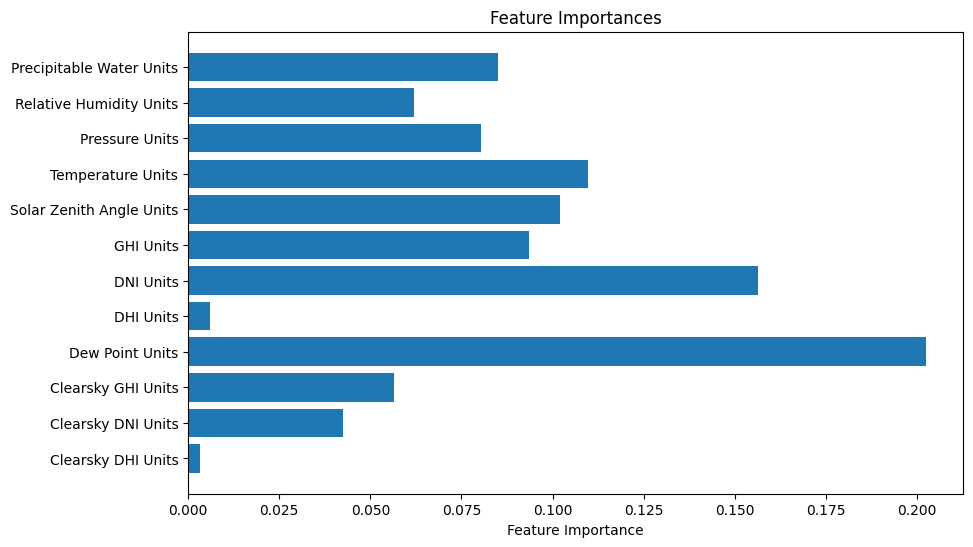

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor,HistGradientBoostingClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt


df = pd.read_excel('main_data.xlsx')

y = df['EL_Solar_CarCharging_total_KW']


X = df[['Clearsky DHI Units', 'Clearsky DNI Units', 'Clearsky GHI Units',
        'Dew Point Units', 'DHI Units', 'DNI Units', 'GHI Units',
        'Solar Zenith Angle Units', 'Temperature Units', 'Pressure Units',
        'Relative Humidity Units', 'Precipitable Water Units']]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model1 = RandomForestRegressor(n_estimators=100, random_state=42)
model1.fit(X_train, y_train)


y_pred = model1.predict(X_test)

r2 = r2_score(y_test, y_pred)


print(f"R-squared (R2): {r2}")


feature_importances = model1.feature_importances_


plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importances')
plt.show()


In [10]:
# Calculate the number of independent variables (features)
k = X.shape[1]

# Calculate the number of data points in the test set
n = X_test.shape[0]

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Calculate adjusted R-squared
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

print(f"R-squared (R2): {r2}")
print(f"Adjusted R-squared: {adjusted_r2}")

R-squared (R2): 0.6590983105141641
Adjusted R-squared: 0.6588696453227818


In [11]:
import pickle
with open('EVmodel.pkl', 'wb') as model_file:
    pickle.dump(model1, model_file)

print("Model saved as 'model.pkl'")

Model saved as 'model.pkl'


## CA data

In [21]:
df1 = pd.read_csv("Raw_Data.csv")
df1.head()

,Date,EL_Solar_BusBarn_Total_KW,Year,5,Day,Hour,Minute,DHI,DNI,GHI,...,Fill Flag,Surface Albedo,Wind Speed,Precipitable Water,Wind Direction,Relative Humidity,Temperature,Pressure,Global Horizontal UV Irradiance (280-400nm),Global Horizontal UV Irradiance (295-385nm)
0,4/1/14 4:00,0.0,2014.0,4.0,1.0,4.0,30.0,0.0,0.0,0.0,...,0.0,0.157,7.8,0.849,271.4,59.41,-3.0,980.0,0.0,0.0
1,4/1/14 5:00,0.0,2014.0,4.0,1.0,5.0,30.0,0.0,0.0,0.0,...,0.0,0.157,7.3,0.621,272.9,59.59,-4.0,980.0,0.0,0.0
2,4/13/14 4:00,0.0,2014.0,4.0,13.0,4.0,30.0,0.0,0.0,0.0,...,0.0,0.160,2.3,3.144,252.8,100.00,13.0,970.0,0.0,0.0
3,4/14/14 2:00,0.0,2014.0,4.0,14.0,2.0,30.0,0.0,0.0,0.0,...,0.0,0.160,8.8,1.711,342.8,93.83,1.0,980.0,0.0,0.0
4,4/14/14 5:00,0.0,2014.0,4.0,14.0,5.0,30.0,0.0,0.0,0.0,...,0.0,0.160,7.2,1.386,347.5,88.41,0.0,980.0,0.0,0.0


R-squared (R2): 0.7902094553039894


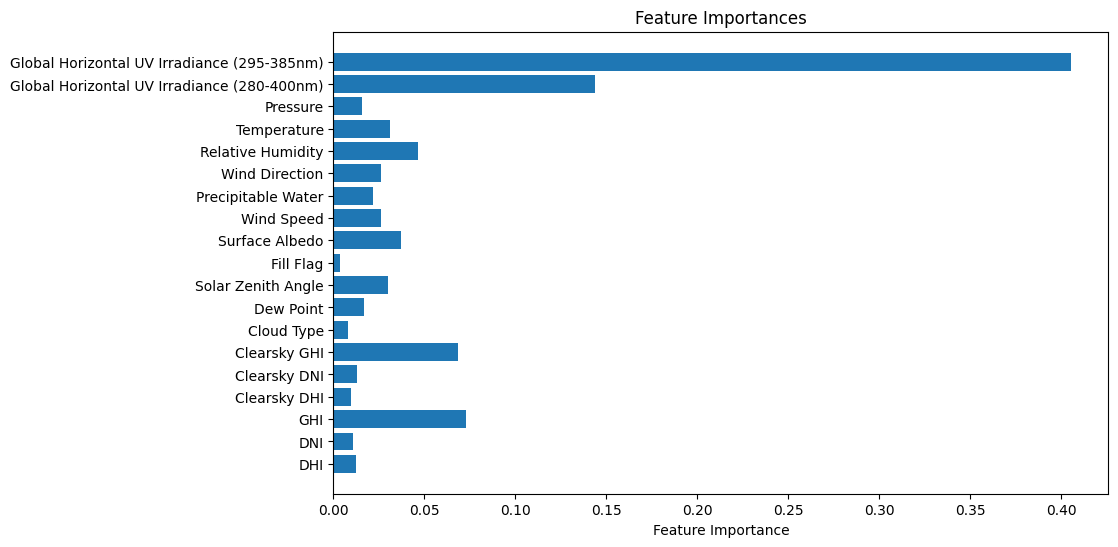

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
import matplotlib.pyplot as plt


# Filter out rows where 'EL_Solar_BusBarn_Total_KW' is not equal to '[-11059] No Good Data For Calculation'
#[remove the row if the column EL_Solar_BusBarn_Total_KW has this value "[-11059] No Good Data For Calculation"
df1 = df1.dropna()

# Define your feature matrix (X) and target variable (y)
X = df1[['DHI', 'DNI', 'GHI', 'Clearsky DHI', 'Clearsky DNI',
       'Clearsky GHI', 'Cloud Type', 'Dew Point', 'Solar Zenith Angle',
       'Fill Flag', 'Surface Albedo', 'Wind Speed', 'Precipitable Water',
       'Wind Direction', 'Relative Humidity', 'Temperature', 'Pressure',
       'Global Horizontal UV Irradiance (280-400nm)',
       'Global Horizontal UV Irradiance (295-385nm)']]

y = df1['EL_Solar_BusBarn_Total_KW']

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a regression model (HistGradientBoostingRegressor)
model2 = RandomForestRegressor(n_estimators=100,random_state=42)
model2.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model2.predict(X_test)

# Evaluate the model using R-squared (R2)
r2 = r2_score(y_test, y_pred)

print(f"R-squared (R2): {r2}")

# Plot feature importances
feature_importances = model2.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importances')
plt.show()


In [24]:
import pickle
with open('CVmodel_random.pkl', 'wb') as model_file:
    pickle.dump(model2, model_file)

print("Model saved as 'model.pkl'")

Model saved as 'model.pkl'


R-squared (R2): 0.7886320186457232


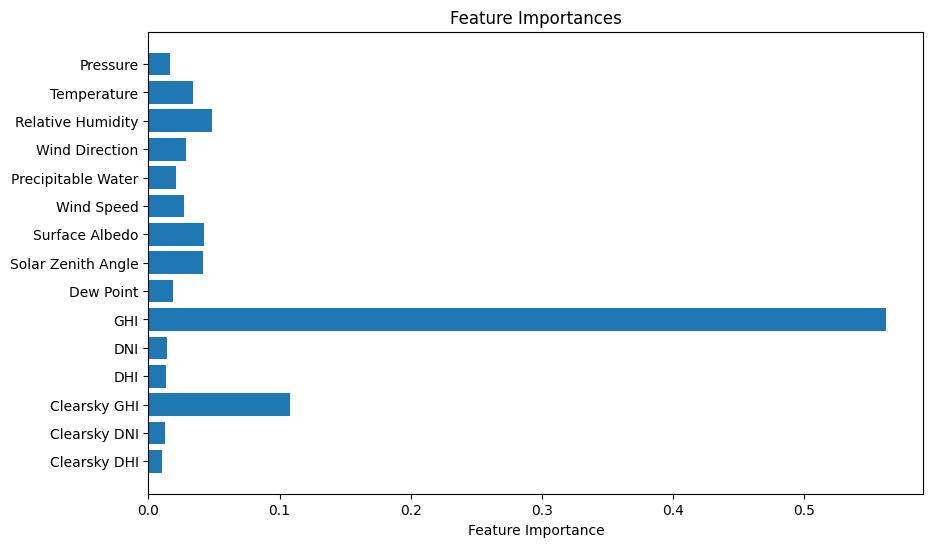

In [25]:
#df2 = df1[df1['EL_Solar_BusBarn_Total_KW'] != '[-11059] No Good Data For Calculation']
X = df1[['Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI',
        'DHI', 'DNI', 'GHI','Dew Point', 'Solar Zenith Angle',
        'Surface Albedo', 'Wind Speed', 'Precipitable Water',
       'Wind Direction', 'Relative Humidity', 'Temperature', 'Pressure']]


y = df1['EL_Solar_BusBarn_Total_KW']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model3 = RandomForestRegressor(n_estimators=100,random_state=42)
model3.fit(X_train, y_train)


y_pred = model3.predict(X_test)

r2 = r2_score(y_test, y_pred)


print(f"R-squared (R2): {r2}")


feature_importances = model3.feature_importances_


plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importances')
plt.show()


In [26]:
# Calculate the number of independent variables (features)
k = X.shape[1]

# Calculate the number of data points in the test set
n = X_test.shape[0]

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Calculate adjusted R-squared
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

print(f"R-squared (R2): {r2}")
print(f"Adjusted R-squared: {adjusted_r2}")

R-squared (R2): 0.7886320186457232
Adjusted R-squared: 0.7884618533537355


In [27]:
import pickle
with open('CVmodel_random2.pkl', 'wb') as model_file:
    pickle.dump(model3, model_file)

print("Model saved as 'model.pkl'")

Model saved as 'model.pkl'


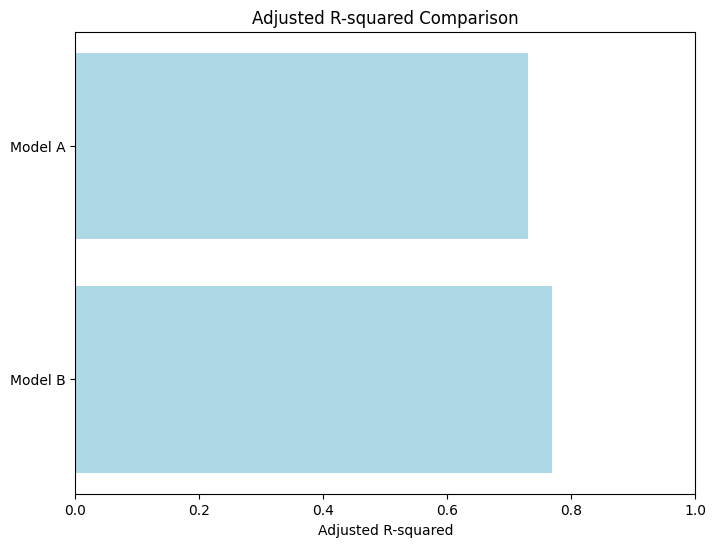

In [28]:
import matplotlib.pyplot as plt

# Model names or labels
model_names = ['Model A', 'Model B']  # Replace with your actual model names

# Adjusted R-squared values for each model
adj_r2_values = [0.730, 0.769]  # Replace with your actual adjusted R-squared values

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.barh(model_names, adj_r2_values, color='lightblue')
plt.xlabel('Adjusted R-squared')
plt.title('Adjusted R-squared Comparison')
plt.xlim(0, 1)  # Set the x-axis limits between 0 and 1 (adjust as needed)
plt.gca().invert_yaxis()  # Invert the y-axis to have the highest value at the top
plt.show()


## Difference between the EVCA vs CA

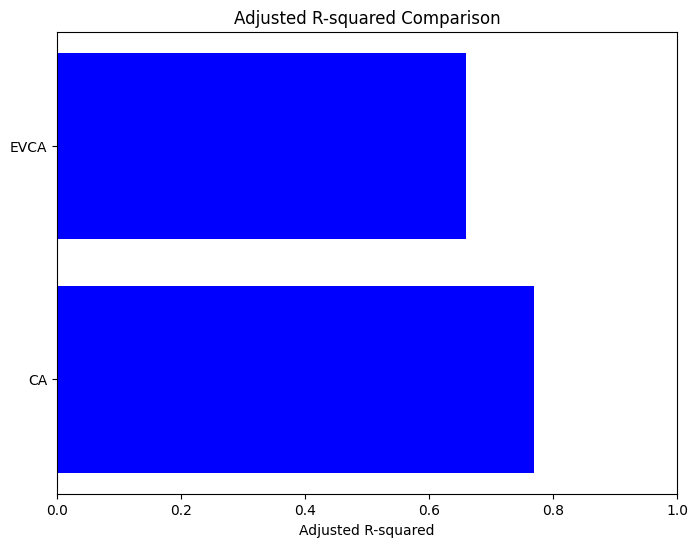

In [29]:
import matplotlib.pyplot as plt

# Model names or labels
model_names = ['EVCA', 'CA']  # Replace with your actual model names

# Adjusted R-squared values for each model
adj_r2_values = [0.659, 0.769]  # Replace with your actual adjusted R-squared values

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.barh(model_names, adj_r2_values, color='blue')
plt.xlabel('Adjusted R-squared')
plt.title('Adjusted R-squared Comparison')
plt.xlim(0, 1)  # Set the x-axis limits between 0 and 1 (adjust as needed)
plt.gca().invert_yaxis()  # Invert the y-axis to have the highest value at the top
plt.show()

## HistGradientBoostingRegressor

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
import matplotlib.pyplot as plt

# Load your DataFrame (df1) here

# Define your feature matrix (X) and target variable (y)
X = df1[['GHI',
       'Clearsky GHI', 'Solar Zenith Angle',
        'Surface Albedo', 'Wind Speed', 'Precipitable Water',
       'Wind Direction', 'Relative Humidity', 'Temperature', 'Pressure',
       'Global Horizontal UV Irradiance (280-400nm)',
       'Global Horizontal UV Irradiance (295-385nm)']]

y = df1['EL_Solar_BusBarn_Total_KW']

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a regression model (HistGradientBoostingRegressor)
model1 = HistGradientBoostingRegressor(random_state=42)
model1.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model1.predict(X_test)

# Evaluate the model using R-squared (R2)
r2 = r2_score(y_test, y_pred)

print(f"R-squared (R2) for HistGradientBoostingRegressor: {r2}")


R-squared (R2) for HistGradientBoostingRegressor: 0.7759954315678778


In [31]:
import pickle
with open('CVmodel_hist.pkl', 'wb') as model_file:
    pickle.dump(model1, model_file)

print("Model saved as 'model.pkl'")

Model saved as 'model.pkl'
